**Instituto Tecnológico de Aeronáutica – ITA**

**Inteligência Artificial para Robótica Móvel – CT-213**

**Professores:** 

Marcos Ricardo Omena de Albuquerque Maximo

André Oliveira Françani


# Laboratório 6 – Redes Neurais

# 1. Introdução
Nesse laboratório, seu objetivo é implementar uma rede neural de 3 camadas (1 camada de entrada, 1 camada escondida e 1 camada de saída) para realizar segmentação de cores para o futebol de robôs. A Figura 1 ilustra esse processo, em que na Figura 1(a) tem-se a imagem original e na 1(b) a imagem após a segmentação.

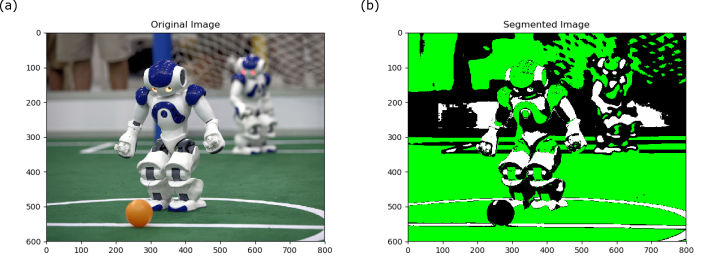

**Figura 1**: segmentação de cores.

# 2. Descrição do Problema

O problema a ser resolvido é a implementação de uma rede neural de três camadas para realizar a segmentação de cores para o futebol de robôs. Para isso, será necessário configurar essa rede neural para realizar classificação multi-classe. Você deve implementar os algoritmos de *Forward Propagation* (inferência) quanto *Back Propagation* (treinamento) para essa rede. Como trata-se de um problema de classificação de multi-classe, deve-se usar uma *loss function* de regressão logística multi-classe: 


$$L\left( y^{(i)}, \hat{y}^{(i)} \right)= - \sum_{c=1}^{C} \left [ \left(1 - y_c^{(i)} \right)\log{\left( 1- \hat{y}_c^{(i)}\right)} + y_c^{(i)}\log{\left( \hat{y}_c^{(i)} \right)} \right]$$


Como de costume, a função de custo é dada pela média dos *losse*s dos exemplos de treinamento:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} L \left( y^{(i)}, \hat{y}^{(i)}\right)$$

Considerando uma rede neural de 3 camadas (1 camada escondida) e com função de ativação sigmóide $\sigma(\cdot)$ em todos os neurônios, chega-se às seguintes equações para o algoritmo de Back Propagation nessa rede: 

$$\frac{\partial L}{\partial w_{ck}^{[2]}} =  \delta_c^{[2]} a_k^{[1]} $$

$$\frac{\partial L}{\partial b_{c}^{[2]}} = \delta_c^{[2]}$$

$$\frac{\partial L}{\partial w_{kj}^{[1]}} = \delta_k^{[1]} a_j^{[0]} $$

$$\frac{\partial L}{\partial b_{k}^{[1]}} = \delta_k^{[1]}$$

em que:

$$\delta_c^{[2]} = (\hat{y}_c - y_c)$$

$$\delta_k^{[1]} = \sum_{c=1}^{C} w_{ck}^{[2]} \delta_c^{[2]} \sigma^{\prime}(z_k^{[1]})$$

A adaptação dessas equações para vetorização fica como exercício. Perceba que essas equações são muito semelhantes às mostradas nos slides, porém há algumas diferenças, especialmente no cálculo do erro na última camada, dado que se utiliza aqui *loss function* de regressão logística, ao invés de erro quadrático. Durante a implementação do algoritmo de *Back Propagation*, é importante lembrar também que a derivada da função sigmóide é dada por: 

$$ \sigma^{\prime}(x) = \sigma(x)(1-\sigma(x))$$


Note ainda que o $L(y^{(i)}, \hat{y}^{(i)})$ se refere a apenas um exemplo de treinamento. Desse modo, lembrando que a rede neural deve ser atualizada com o gradiente de $J(\theta)$, você deve calcular as derivadas parciais de $L(y^{(i)}, \hat{y}^{(i)})$ para cada exemplo $𝑖$ e tirar a média. Para simplificar, não será implementado nenhum mecanismo de regularização na rede neural.

Para a segmentação de cores, para simplificar, usar-se-á apenas duas classes de cores: verde e branco, que são as cores mais abundantes no ambiente do futebol de robôs. No *dataset*, há algumas outras cores (como o laranja da bola). Durante o treinamento da rede, essas outras cores serão marcadas como sendo da classe 0 [0, 0], i.e. como se representassem uma classe de cor indefinida. Então, na segmentação final, as cores indefinidas são mostradas como preto. Também, por simplicidade, o *dataset* está usando espaço de cor RGB.

No *dataset* de cores fornecido, há 78990 exemplos. Como realizar um passo do *Back Propagation* num *dataset* tão grande seria muito lento, utiliza-se o conceito de *mini-batch*, logo a rede é treinada com Descida de Gradiente Estocástica. O *mini-batch* usado consiste de 100 exemplos aleatórios de treinamento de cada classe (incluindo a classe de cor indefinida). No caso do *dataset* considerado, há muito mais pixels verdes do que de outras cores, pois o campo do futebol de robôs é verde. Com isso, se o *batch* de treinamento mantivesse a mesma distribuição de cores que o *dataset* original, a rede daria preferência para aprender o verde em detrimento das demais cores. Esse problema de desbalanceamento de exemplos de treinamento
é comum em redes neurais. Finalmente, destaca-se que se aplica normalização nos valores de entrada para facilitar o treinamento: normalmente, os valores de cada canal de cor RGB está na faixa 0-255. Como esses são valores altos, de modo que fica ruim para uma rede com função de ativação sigmóide, usou-se como dados de entrada para a rede os valores $\frac{R}{255}$, $\frac{G}{255}$ e $\frac{B}{255}$.

# 3.	Código Base

O código base já implementa o teste da rede neural e o treinamento e teste da segmentação de cores. Segue uma breve descrição das células fornecidas:

- **Implementação da Rede Neural**: na classe ``NeuralNetwork``, você deve implementar os métodos ``forward_propagation()``, ``compute_gradient_back_propagation()`` e ``back_propagation()``. 

- Arquivo ``utils.py``: funções utilitárias.

- **Teste da Rede Neural**: testa a implementação da rede neural com algumas funções de classificação simples (com uma classe):

  - ``sum_gt_zero()``: função que classifica se a soma das duas entradas é maior que zero.

  - ``xor()``: função inspirada na operação de ou exclusivo que classifica se as duas entradas tem o mesmo sinal.
  
- test_color_segmentation.py: realiza o aprendizado da segmentação de cores e exibe o resultado.

Destaca-se que os treinamentos das redes neurais podem demorar alguns minutos. Os hiperparâmetros definidos em cada *script* já foram ajustados pelo professor para o problema, mas fique à vontade para alterá-los caso sinta necessidade.


# 4. Tarefas

Comece rodando a célula abaixo para fazer o *download* das imagens do laboratório e do arquivo utils.py com funções utilitárias.

In [137]:
import zipfile
import os

# download data (MUST RUN)
!gdown --id 1p1fGckaKDdtbauesDmqhi2HtXuUNu_8g

with zipfile.ZipFile("lab6_ct213_2022.zip","r") as zip_ref:
  zip_ref.extractall() # extracts in current directory

# make results folder to save images
if not os.path.exists('results'):
  os.makedirs('results')
  
os.remove("lab6_ct213_2022.zip")

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1p1fGckaKDdtbauesDmqhi2HtXuUNu_8g
To: /content/lab6_ct213_2022.zip
100% 228k/228k [00:00<00:00, 48.0MB/s]


## 4.1. Implementação da Rede Neural

Sua primeira tarefa consiste em implementar as operações de *Forward Propagation* e *Back Propagation* da rede neural. O *Forward Propagation* da rede em questão segue as mesmas equações mostradas nos *slides*. Já o *Back Propagation* segue as equações mostradas na Seção 2, que são diferentes das mostradas nos *slides*, por conta de estarmos usando uma função de custo diferente aqui.

Não há necessidade de implementar as operações da rede neural da forma mais eficiente possível (a não ser que os treinamentos estejam demorando excessivamente nos seus testes). Caso sua implementação tenha ficado proibitivamente lenta, a ponto de não conseguir realizar as tarefas propostas, fique à vontade para conversar com o professor. Além disso, sua implementação pode se aproveitar fortemente das restrições impostas na rede: três camadas e funções de ativação sigmóide em todos os neurônios.


**Observação**: na notação usada nos *slides*, a camada $𝑙 = 0$ da rede neural é a camada de entrada, de modo que não há pesos nem *biases* associados a ela. Desse modo, para que a notação no código fique igual à dos *slides*, define-se uma posição 0 com ``None`` nas listas que definem as matrizes de peso e os vetores de *biases*. Verifique como as variáveis *weights* e *biases* são inicializadas no código para entender melhor essa observação.

In [159]:
import numpy as np
from utils import sigmoid, sigmoid_derivative


class NeuralNetwork:
    """
    Represents a two-layers Neural Network (NN) for multi-class classification.
    The sigmoid activation function is used for all neurons.
    """
    def __init__(self, num_inputs, num_hiddens, num_outputs, alpha):
        """
        Constructs a three-layers Neural Network.

        :param num_inputs: number of inputs of the NN.
        :type num_inputs: int.
        :param num_hiddens: number of neurons in the hidden layer.
        :type num_hiddens: int.
        :param num_outputs: number of outputs of the NN.
        :type num_outputs: int.
        :param alpha: learning rate.
        :type alpha: float.
        """
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        self.num_outputs = num_outputs
        self.alpha = alpha
        self.weights = [None] * 3
        self.biases = [None] * 3
        self.weights[1] = 0.001 * np.random.randn(num_hiddens, num_inputs)
        self.weights[2] = 0.001 * np.random.randn(num_outputs, num_hiddens)
        self.biases[1] = np.zeros((num_hiddens, 1))
        self.biases[2] = np.zeros((num_outputs, 1))

    def forward_propagation(self, inputs):
        """
        Executes forward propagation.
        Notice that the z and a of the first layer (l = 0) are equal to the NN's input.

        :param inputs: inputs to the network.
        :type inputs: (num_inputs, num_samples) numpy array.
        :return z: values computed by applying weights and biases at each layer of the NN.
        :rtype z: 3-dimensional list of (num_neurons[l], num_samples) numpy matrices.
        :return a: activations computed by applying the activation function to z at each layer.
        :rtype a: 3-dimensional list of (num_neurons[l], num_samples) numpy matrices.
        """
        z = [None] * 3
        a = [None] * 3
        z[0] = inputs
        a[0] = inputs


        z[1] = self.weights[1]@a[0] + self.biases[1]
        a[1] = sigmoid(z[1])

        z[2] = self.weights[2]@a[1] + self.biases[2]
        a[2] = sigmoid(z[2])


        return z, a

    def compute_cost(self, inputs, expected_outputs):
        """
        Computes the logistic regression cost of this network.

        :param inputs: inputs to the network.
        :type inputs: (num_inputs, num_samples) numpy array.
        :param expected_outputs: expected outputs of the network.
        :type expected_outputs: list of numpy matrices.
        :return: logistic regression cost.
        :rtype: float.
        """
        z, a = self.forward_propagation(inputs)
        y = expected_outputs
        y_hat = a[-1]
        cost = np.mean(-(y * np.log(y_hat) + (1.0 - y) * np.log(1.0 - y_hat)))
        return cost

    def compute_gradient_back_propagation(self, inputs, expected_outputs):
        """
        Computes the gradient with respect to the NN's parameters using back propagation.

        :param inputs: inputs to the network.
        :type inputs: (num_inputs, num_samples) numpy array.
        :param expected_outputs: expected outputs of the network.
        :type expected_outputs: (num_outputs, num_samples) numpy array.
        :return weights_gradient: gradients of the weights at each layer.
        :rtype weights_gradient: 3-dimensional list of numpy arrays.
        :return biases_gradient: gradients of the biases at each layer.
        :rtype biases_gradient: 3-dimensional list of numpy arrays.
        """
        weights_gradient = [None] * 3
        biases_gradient = [None] * 3
        delta = [None] * 3


        m = np.size(expected_outputs, axis=-1)
        y = expected_outputs
        z,a = self.forward_propagation(inputs)
        
        # Output layer
        delta[2] = a[-1] - y


        # Hidden layer
        delta[1] = (self.weights[2].transpose()@delta[2])*sigmoid_derivative(z[1])

        # Biases gradient
        biases_gradient[1] = np.sum(delta[1], axis=1, keepdims=True)*(1/m)
        biases_gradient[2] = np.sum(delta[2], axis=1, keepdims=True)*(1/m)


        # Weights gradient
        weights_gradient[2] = (delta[2]@a[1].transpose())*(1/m)
        weights_gradient[1] = (delta[1]@inputs.transpose())*(1/m)

        

        return biases_gradient, weights_gradient

    def back_propagation(self, inputs, expected_outputs):
        """
        Executes the back propagation algorithm to update the NN's parameters.

        :param inputs: inputs to the network.
        :type inputs: (num_inputs, num_samples) numpy array.
        :param expected_outputs: expected outputs of the network.
        :type expected_outputs: (num_outputs, num_samples) numpy array.
        """
        biases_gradient, weights_gradient = self.compute_gradient_back_propagation(inputs, expected_outputs)

        self.weights[1] = self.weights[1] - self.alpha*weights_gradient[1]
        self.biases[1] = self.biases[1] - self.alpha*biases_gradient[1]
        
        self.weights[2] = self.weights[2] - self.alpha*weights_gradient[2]
        self.biases[2] = self.biases[2] - self.alpha*biases_gradient[2]

## 4.2 Teste da Rede Neural

Após a implementação da rede, utilize a célula abaixo para testá-la. Teste primeiramente com a função de classificação ``sum_gt_zero()`` e posteriormente com a ``xor()``. Para alterar a função utilizada, basta alterar a variável *classification_function*. Em ambos os casos, usa-se 10 neurônios na camada escondida e taxa de aprendizado de 6. Adicione todos os gráficos auto-gerados no seu relatório e os discuta.

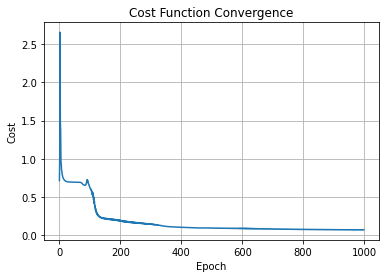

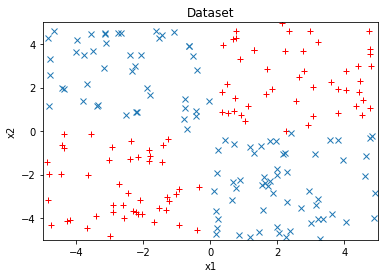

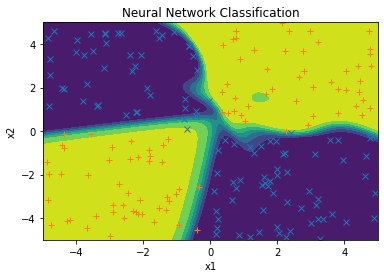

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from utils import sum_gt_zero, xor


num_cases = 200  # number of auto-generated cases
num_epochs = 1000  # number of epochs for training
classification_function = xor  # selects sum_gt_zero as the classification function
# classification_function = xor  # selects xor as the classification function

# Figure format used for saving figures
fig_format = 'png'  # for Word users
# fig_format = 'svg'
# fig_format = 'eps'  # for LaTeX users

# Setting the random seed of numpy's random library for reproducibility reasons
np.random.seed(0)

# Creating the dataset
inputs = 5.0 * (-1.0 + 2.0 * np.random.rand(num_cases, 2))
expected_outputs = np.array([classification_function(x) for x in inputs])

# Separating the dataset into positive and negative samples
positives_indices = np.where(expected_outputs >= 0.5)
negatives_indices = np.where(expected_outputs < 0.5)
positives = inputs[positives_indices]
negatives = inputs[negatives_indices]

# Creating and training the neural network
neural_network = NeuralNetwork(2, 10, 1, 6.0)
costs = np.zeros(num_epochs)
inputs_nn = inputs.T
for i in range(num_epochs):
    neural_network.back_propagation(inputs_nn, expected_outputs)
    costs[i] = neural_network.compute_cost(inputs_nn, expected_outputs)
    #print('epoch: %d; cost: %f' % (i + 1, costs[i]))

# Plotting cost function convergence
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid()
plt.savefig('results/cost_function_convergence_{}.{}'.format(classification_function.__name__, fig_format), format=fig_format)

# Plotting positive and negative samples
plt.figure()
plt.plot(positives[:, 0], positives[:, 1], '+r')
plt.plot(negatives[:, 0], negatives[:, 1], 'x')
plt.xlim([-5.0, 5.0])
plt.ylim([-5.0, 5.0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')
plt.savefig('results/dataset_{}.{}'.format(classification_function.__name__, fig_format), format=fig_format)

# Plotting the decision regions of the neural network
plt.figure()
x = np.arange(-5.0, 5.05, 0.05)
y = np.arange(-5.0, 5.05, 0.05)
xx, yy = np.meshgrid(x, y)
inputs_region = np.array([xx.flatten(), yy.flatten()])
_, a = neural_network.forward_propagation(inputs_region)
z = a[-1].reshape(len(x), len(y))
plt.contourf(x, y, z)
plt.xlim([-5.0, 5.0])
plt.ylim([-5.0, 5.0])
plt.plot(positives[:, 0], positives[:, 1], '+', color='tab:orange')
plt.plot(negatives[:, 0], negatives[:, 1], 'x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Neural Network Classification')
plt.savefig('results/neural_net_classification_{}.{}'.format(classification_function.__name__, fig_format), format=fig_format)

## 4.3.	Segmentação de Cores

Para realizar o aprendizado e teste da segmentação de cores, rode a célula implementada abaixo. Para essa rede, usou-se 20 neurônios na camada escondida e taxa de aprendizado 6. Coloque em seu relatório as figuras geradas e discuta os resultados obtidos.


Training the neural network...
Evaluating the neural network on the test set...
Cost on the test set: 0.017662
Segmenting image...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

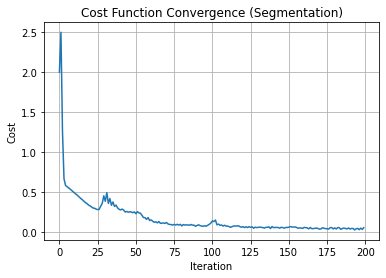

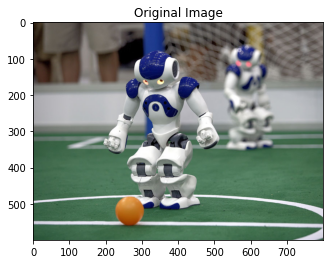

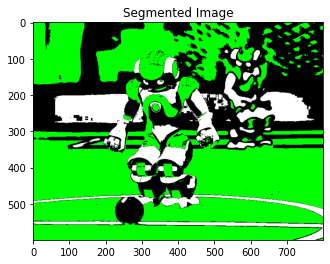

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.image import imread

threshold = 0.5  # threshold used for discretizing the output
num_iterations = 200  # number of epochs for training
mini_batch_samples_per_class = 100  # number of samples per class used in the mini-batch

# Figure format used for saving figures
fig_format = 'png'  # for Word users
# fig_format = 'svg'
# fig_format = 'eps'  # for LaTeX users


def encode_class(c):
    """
    Transforms a class representation as a number into an array of 0's and 1's.
    1 -> [1 0]; 2 -> [0 1]; otherwise -> [0 0].

    :param c: class as a number.
    :type c: int.
    :return: class as an array of 0's and 1's.
    :rtype: numpy matrix.
    """
    if c == 1:
        return np.array([1, 0])
    elif c == 2:
        return np.array([0, 1])
    else:
        return np.array([0, 0])


def decode_class(c):
    """
    Transforms a class representation as an array of 0's and 1's into a number.

    :param c: class as an array of 0's and 1's.
    :type c: numpy matrix.
    :return: class as a number.
    :rtype: int.
    """
    index = np.argmax(c)
    if c[index] < threshold:
        return 0
    return index + 1


# Loading the image
image = imread('nao1.jpg')

# Setting the random seed of numpy's random library for reproducibility reasons
np.random.seed(0)

# Loading the dataset
data = np.loadtxt('nao1.txt')
num_cases = data.shape[0]

# 70 percent of the samples of each class are selected randomly for making the training set.
# Then, the remaining samples are used for the test set.
greens = []
whites = []
others = []
for i in range(num_cases):
    c = data[i, 3]
    if abs(c - 1) < 1.0e-3:  # if the pixel is in class 1
        greens.append(i)
    elif abs(c - 2) < 1.0e-3:  # if the pixel is in class 2
        whites.append(i)
    else:  # if the pixel isn't in class 1 or 2, then we say its class is undefined (class 0)
        others.append(i)
num_greens = len(greens)
num_whites = len(whites)
num_others = len(others)
num_greens_training = math.floor(0.7 * num_greens)
num_whites_training = math.floor(0.7 * num_whites)
num_others_training = math.floor(0.7 * num_others)
np.random.shuffle(greens)
np.random.shuffle(whites)
np.random.shuffle(others)
greens_training = greens[0:num_greens_training]
whites_training = whites[0:num_whites_training]
others_training = others[0:num_others_training]
greens_test = greens[num_greens_training:-1]
whites_test = greens[num_whites_training:-1]
others_test = greens[num_others_training:-1]
test_set = greens_test + whites_test + others_test

# Training the neural network
print('Training the neural network...')
neural_network = NeuralNetwork(3, 20, 2, 6.0)
costs = np.zeros(num_iterations)
for i in range(num_iterations):
    np.random.shuffle(greens_training)
    np.random.shuffle(whites_training)
    np.random.shuffle(others_training)
    mini_batch = greens_training[0:mini_batch_samples_per_class] + whites_training[0:mini_batch_samples_per_class] + \
                   others_training[0:mini_batch_samples_per_class]
    inputs = (1.0 / 255.0) * data[mini_batch, 0:3].T
    expected_outputs = np.array([encode_class(x) for x in data[mini_batch, 3]]).T
    neural_network.back_propagation(inputs, expected_outputs)
    costs[i] = neural_network.compute_cost(inputs, expected_outputs)
    #print('iteration: %d; cost: %f' % (i + 1, costs[i]))

# Plotting cost function convergence
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence (Segmentation)')
plt.grid()
plt.savefig('results/cost_function_convergence_segmentation.{}'.format(fig_format), format=fig_format)

# Evaluating the neural network on the test set
print('Evaluating the neural network on the test set...')
inputs_test = (1.0 / 255.0) * np.array(data[test_set, 0:3]).T
expected_outputs_test = np.array([encode_class(x) for x in data[test_set, 3]]).T
cost_test = neural_network.compute_cost(inputs_test, expected_outputs_test)
print('Cost on the test set: %f' % cost_test)

# Segmenting an actual image
height = image.shape[0]
width = image.shape[1]
num_channels = image.shape[2]

colors = [(0, 0, 0), (0, 255, 0), (255, 255, 255)]
print('Segmenting image...')
_, a = neural_network.forward_propagation((1.0 / 255.0) * image.reshape(image.shape[0] * image.shape[1], image.shape[2]).T)
c = np.array([colors[decode_class(y)] for y in a[-1].T])
segmented_image = c.reshape(height, width, num_channels)

plt.figure()
plt.imshow(image)
plt.title('Original Image')
plt.savefig('results/original_image.{}'.format(fig_format), format=fig_format)
plt.figure()
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.savefig('results/segmented_image.{}'.format(fig_format), format=fig_format)

from google.colab import files
import os
os.system('zip -r lab6_results.zip results')
files.download("lab6_results.zip")

# 5. Entrega

A entrega consiste do notebook no formato **.ipynb** e de um relatório, submetida através do Google Classroom. Modificações nos arquivos do código base são permitidas, desde que o nome e a interface dos scripts “main” não sejam alterados. A princípio, não há limitação de número de páginas para o relatório, mas pede-se que seja sucinto. O relatório deve conter:

- Breve descrição em alto nível da sua implementação.
- Figuras que comprovem o funcionamento do seu código.

Por limitações do Google Classroom (e por motivo de facilitar a automatização da correção), entregue seu laboratório com todos os arquivos num único arquivo **.zip** (**não** utilize outras tecnologias de compactação de arquivos) com o seguinte padrão de nome: **“<login_email_google_education>_labX.zip”**. Por exemplo, no meu caso, meu login Google Education é **marcos.maximo**, logo eu entregaria o lab 6 como **“marcos.maximo_lab6.zip”**. **Não** crie subpastas para os arquivos da sua entrega, **deixe todos os arquivos na “raiz” do .zip**. Os relatórios devem ser entregues em formato **.pdf**.

# 6.	Dicas

- Não é obrigatório implementar a rede neural com vetorização, mas é altamente recomendado. A diferença de desempenho é significativa: com implementação completamente vetorizada, a sua rede deve treinar praticamente instantaneamente. Uma vetorização “parcial” também é possível, caso ache mais fácil.

- Observação: quando fala-se *array* em NumPy, este *array* pode ser N-dimensional.

- Perceba que as matrizes *inputs* e *expected_outputs* possuem dimensões (*num_inputs*, *num_samples*) e (*num_outputs*, *num_samples*), respectivamente. Isso é diferente do que vem sendo praticado nas *frameworks* de redes neurais, mas mantive assim para ficar coerente com a notação dos slides.

- Em ``utils.py``, há uma função ``sigmoid_derivative()``, que calcula a derivada da função sigmóide (funciona para array).

- As implementações parciais nos métodos na classe ``NeuralNetwork`` são apenas para guiar a implementação do aluno. Fique à vontade para mudá-las, desde que a interface de código não seja quebrada.

- Para um array do NumPy, o operador de multiplicação de matriz elemento a elemento (*element-wise*) é *, enquanto a multiplicação usual de matriz usa o operador @.

- Diferentemente de como é feito nos slides, você não precisa repetir o vetor de *biases* para calcular o vetor $z^{[l]}$ de forma vetorizada. Basta somar o vetor de *biases* com a matriz resultante do produto dos pesos com o vetor de ativações da camada anterior que o NumPy se encarrega de fazer a operação corretamente. Para entender melhor, veja: https://numpy.org/doc/stable/user/basics.broadcasting.html 
	
- A função ``np.mean(x)`` calcula a média de todos os elementos do array x. Caso queira fazer a média em apenas uma direção, usar ``np.mean(x, axis=dim)``, em que dim é o índice da dimensão.

- Para aplicar o logaritmo neperiano em toda um array x, use ``np.log(x)``.
	
- Caso você tenha algum problema em *runtime* durante o cálculo do log na função de custo, o motivo provavelmente é algum *bug* no seu código. Evite ficar tentando fazer “gambiarras” na função de custo para desaparecer com esse problema, provavelmente só vão mascarar algum *bug*.
	
- No cálculo dos gradientes, não esqueça de dividir pelo número de exemplos!
	
- Os tamanhos das dimensões de um array N-dimensional podem ser obtidos com ``array.shape``.
	
- Em uma situação, eu necessitei transformar um array unidimensional de n elementos em uma matriz bidimensional com $n \times 1$ elementos (i.e. vetor da MAT). Um jeito fácil de fazer isso é usar:
``x = x.reshape((x.shape[0], 1))``.

- Para fazer o download das figuras e usá-las no relatório, use os seguintes comandos:
```python
from google.colab import files
import os
os.system('zip -r lab6_results.zip results')
files.download("lab6_results.zip")
```

